In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7e4e565f-da35-1eaa-b349-57b61f9e1e7e)


In [2]:
!pip install sidetable
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=a652922954fe821a4eaf55f2a30b15d2520b12093a0865f47006666c010c7ffc
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [3]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import sidetable as stb
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [4]:
#reading datasets
df_train=pd.read_csv('/content/train_data_evaluation_part_2.csv')
df_test=pd.read_csv('/content/test_data_evaluation_part2.csv')

In [5]:
#concatinating the two datasets for a final dataset
final_df=pd.concat([df_test.assign(ind='test'), df_train.assign(ind='train')],ignore_index=True)

In [6]:
final_df.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,ind
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,test
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,1,15,5,16,16,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,test
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,test
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,test
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0,test


## Feature Engineering

In [7]:
#checking different columns
final_df.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'ind'],
      dtype='object')

In [8]:
#checking shape of dataset
final_df.shape

(83580, 31)

In [9]:
#checking null values
final_df.isnull().sum()

Unnamed: 0                 0
ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
ind                        0
dtype: int64

1) There are some null values in Age

In [10]:
#checking % of null values in Age
(final_df['Age'].isnull().sum()/len(final_df['Age']))*100

4.521416606843742

In [11]:
#checking info of dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83580 entries, 0 to 83579
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            83580 non-null  int64  
 1   ID                    83580 non-null  int64  
 2   Nationality           83580 non-null  object 
 3   Age                   79801 non-null  float64
 4   DaysSinceCreation     83580 non-null  int64  
 5   AverageLeadTime       83580 non-null  int64  
 6   LodgingRevenue        83580 non-null  float64
 7   OtherRevenue          83580 non-null  float64
 8   BookingsCanceled      83580 non-null  int64  
 9   BookingsNoShowed      83580 non-null  int64  
 10  BookingsCheckedIn     83580 non-null  int64  
 11  PersonsNights         83580 non-null  int64  
 12  RoomNights            83580 non-null  int64  
 13  DaysSinceLastStay     83580 non-null  int64  
 14  DaysSinceFirstStay    83580 non-null  int64  
 15  DistributionChannel

In [12]:
#describing dataset
final_df.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83580.000000,83580.000000,79801.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,41789.619646,41790.619646,45.398905,453.693814,66.201651,298.819004,67.587589,0.002022,0.000634,0.794652,4.649127,2.358579,401.114262,403.396411,0.047487,0.001412,0.000251,0.000873,0.002848,0.001711,0.013221,0.352728,0.142558,0.000335,0.003506,0.000120,0.088382
std,24127.816865,24127.816865,16.572512,313.371700,87.761626,372.863856,114.330121,0.066774,0.029547,0.695790,4.567391,2.281721,347.198982,347.964911,0.212680,0.037548,0.015849,0.029541,0.053287,0.041328,0.114220,0.477822,0.349624,0.018300,0.059105,0.010938,0.283852
min,0.000000,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20894.750000,20895.750000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,26.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41789.500000,41790.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,2.000000,366.000000,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62684.250000,62685.250000,57.000000,723.000000,103.000000,402.000000,87.600000,0.000000,0.000000,1.000000,6.000000,4.000000,693.000000,697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83589.000000,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,1104.000000,1186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1) Mean age is 45

2) There are also some negative values in age (-11), same with AverageLeadTime (-1)

3) Max age is 122, which maybe a outlier

In [13]:
#describing dataset (categorical varibales)
final_df.describe(include = 'O')

,Nationality,DistributionChannel,MarketSegment,ind
count,83580,83580,83580,83580
unique,188,4,7,2
top,FRA,Travel Agent/Operator,Other,train
freq,12418,68561,48035,82580


In [14]:
# filling the NaN values with mean of Age
final_df['Age'] = final_df['Age'].fillna(int(final_df['Age'].mean()))

In [15]:
# Removing negative values
final_df=final_df[final_df['Age']>0]
final_df=final_df[final_df['AverageLeadTime']>0]
final_df=final_df[final_df['DaysSinceLastStay']>0]
final_df=final_df[final_df['DaysSinceFirstStay']>0]

## Data Visualization

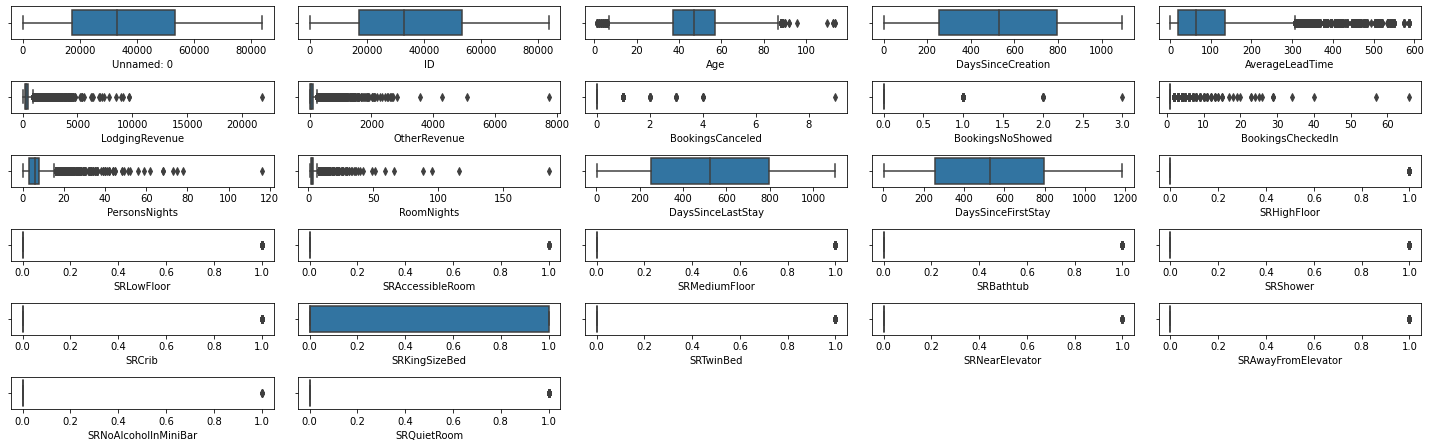

In [16]:
### checking the outliers 
plt.figure(figsize = (20, 10))
x = 1 

for column in final_df.describe().columns:
    plt.subplot(10,5,x)
    sns.boxplot(final_df[column])
    x+=1
    
plt.tight_layout()

1) We can see that there are many outliers in Some of the columns

2) We will handle the outliers by binning the columns that has outliers in it

3) Columns like SRHighFloor, SRLowFloor, SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom doesn't have outliers as they have only two values 0 and 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f151ab09e10>,
      dtype=object)

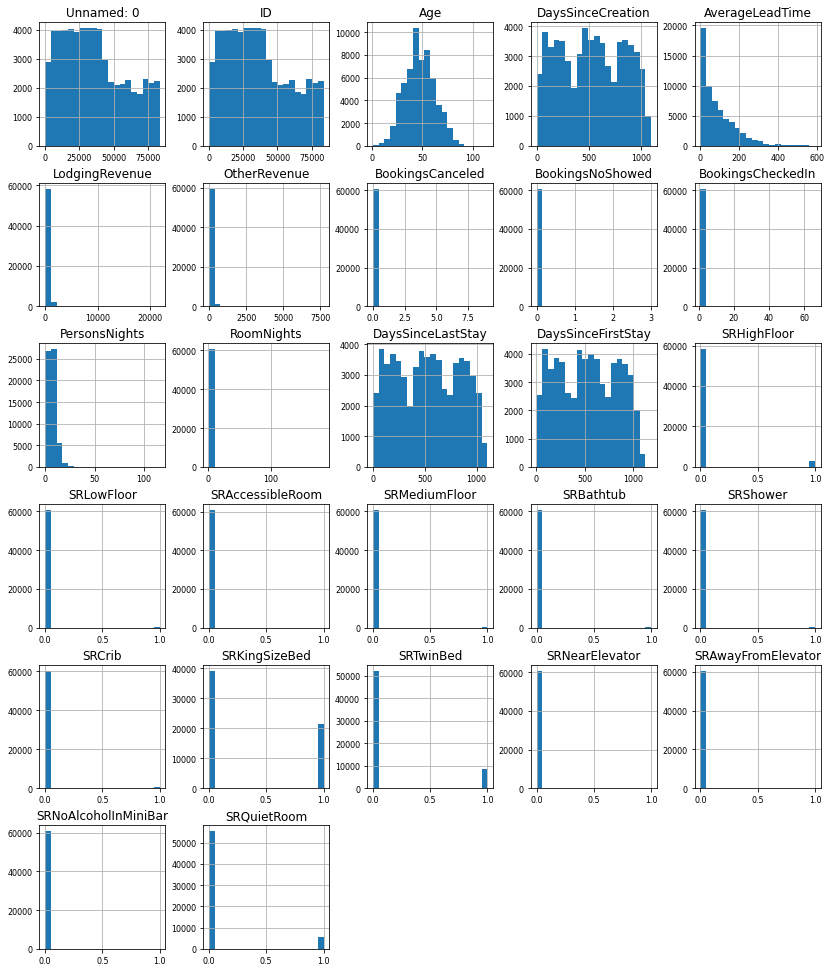

In [17]:
# Histograms of all numberic variables
numerical=final_df.select_dtypes(include=[np.number]).columns.tolist()
final_df[numerical].hist(bins=20, figsize=(14, 20), layout=(7, 5), xlabelsize=8, ylabelsize=8)

1) Most of the data is right skewed

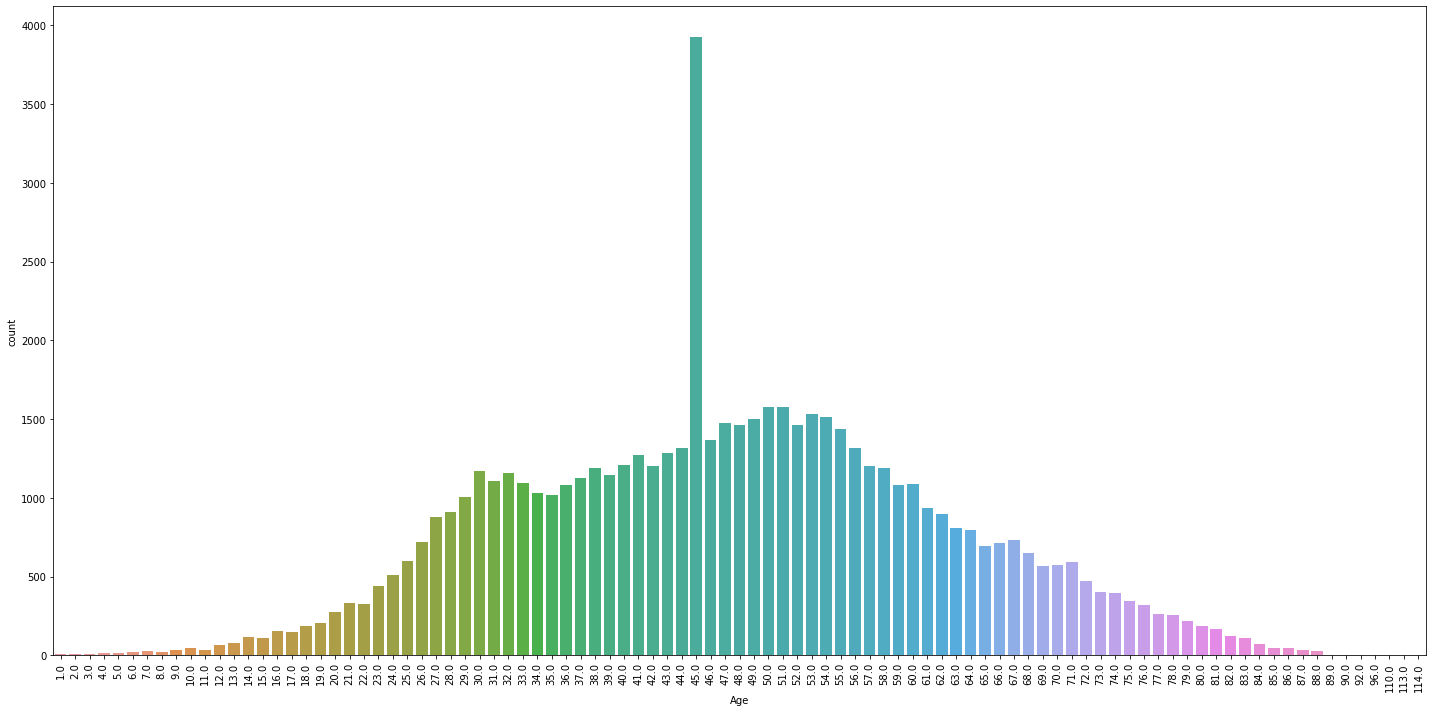

In [18]:
#plotting age to see its distribution
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
ax = sns.countplot(x='Age',data=final_df)
plt.tight_layout()
plt.show()

1) The data is normally distributed around AGE

In [19]:
# Checking nationalities which occurred most of the time within the table and removing the rest of nationalities.
top_15 = final_df['Nationality'].value_counts().head(15)
fig = px.pie(names=top_15.keys(),values = top_15.values, title='Distribution of Nationalities')
fig.show()

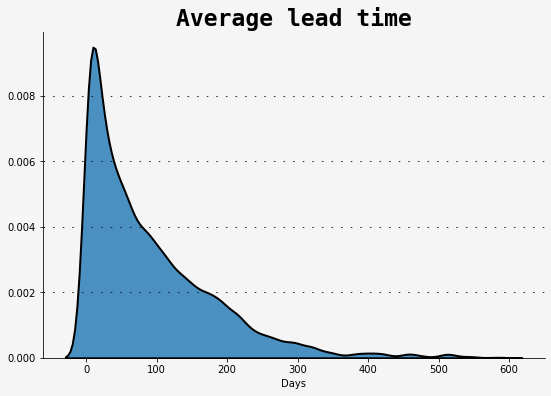

In [20]:
#plotting Average lead time
fig, ax = plt.subplots(figsize=(9, 6))
sns.kdeplot(final_df['AverageLeadTime'], shade=True, alpha=0.8, linewidth=2, edgecolor='black')
sns.despine()
fig.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
ax.set_ylabel('')
ax.set_xlabel('Days')
ax.grid(False)
ax.grid(which='both', axis='y', color='black', linestyle=':', dashes=(2,10))
ax.set_title('Average lead time', fontsize=23, fontweight='bold', fontfamily='monospace')
plt.show()

In [21]:
#creating new features to do multivariate analysis
final_df['total_revenue']=final_df['LodgingRevenue']+final_df['OtherRevenue']
final_df['PersonsperRoom'] = final_df['PersonsNights'] / final_df['RoomNights']
final_df['PersonsperRoom'].fillna(0, inplace=True)

final_df['AgeGroups'] = pd.cut(final_df['Age'], bins=[-1, 20, 40, 60, 125], labels=['0-20', '21-40', '41-60', '60+'])
final_df['AgeGroups'] = final_df['AgeGroups'].cat.add_categories('Unknown')
final_df['AgeGroups'].fillna('Unknown', inplace=True)

avg_by_age = final_df.groupby('AgeGroups').mean()

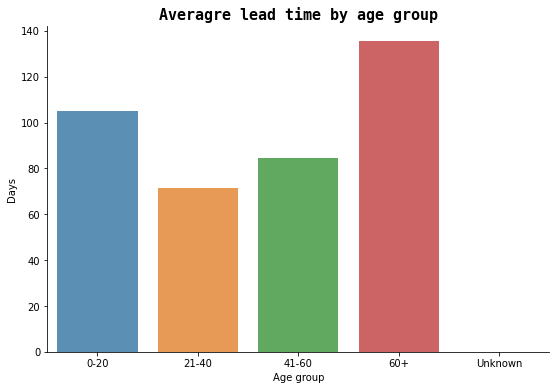

In [22]:
#Averagre lead time by age group
fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(data=avg_by_age, x=avg_by_age.index, y='AverageLeadTime', alpha=0.8, linewidth=3)
sns.despine()
ax.set_xlabel('Age group')
ax.set_ylabel('Days')
ax.set_title('Averagre lead time by age group', fontsize=15, fontweight='bold', fontfamily='monospace')
plt.show()

1) On average older people from our dataset tend to book they vacations earlier

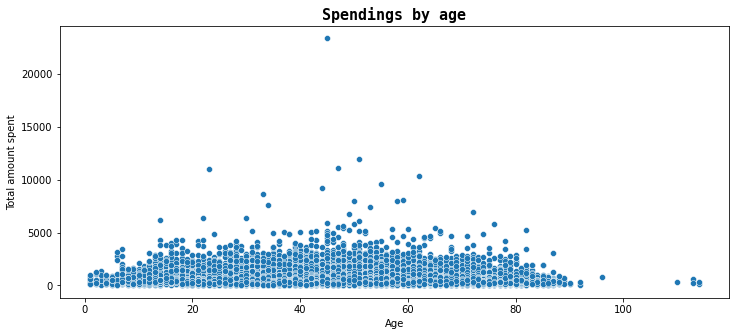

In [23]:
#Total amount spent
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x=final_df['Age'], y=final_df['total_revenue'])
ax.set_xlabel('Age')
ax.set_ylabel('Total amount spent')
ax.set_title('Spendings by age', fontsize=15, fontweight='bold', fontfamily='monospace')
plt.show()

1) Spendings across our dataset are fairly normally distributed

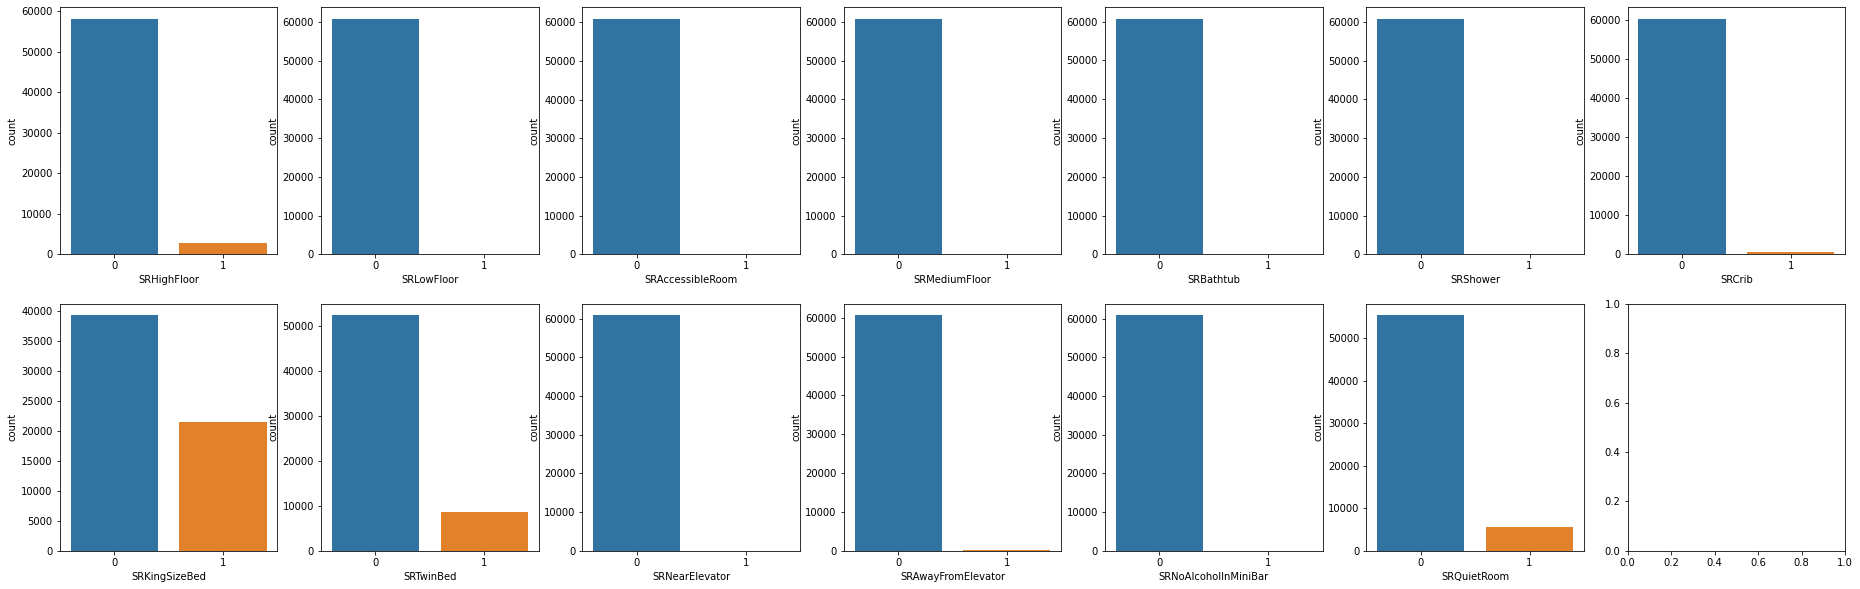

In [24]:
# behaviour of customers
lst=['SRHighFloor','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator',
     'SRAwayFromElevator','SRNoAlcoholInMiniBar','SRQuietRoom']

fig , ax = plt.subplots(2,7,figsize = (32,10))
for i , subplots in zip (lst , ax.flatten()):
  sns.countplot(final_df[i],ax = subplots)
plt.show()

1) Most of the customers don't ask for any special accommodations

2) Only a small percentage of people ask for King Size Bed followed by Twin bed and Quiet Room 

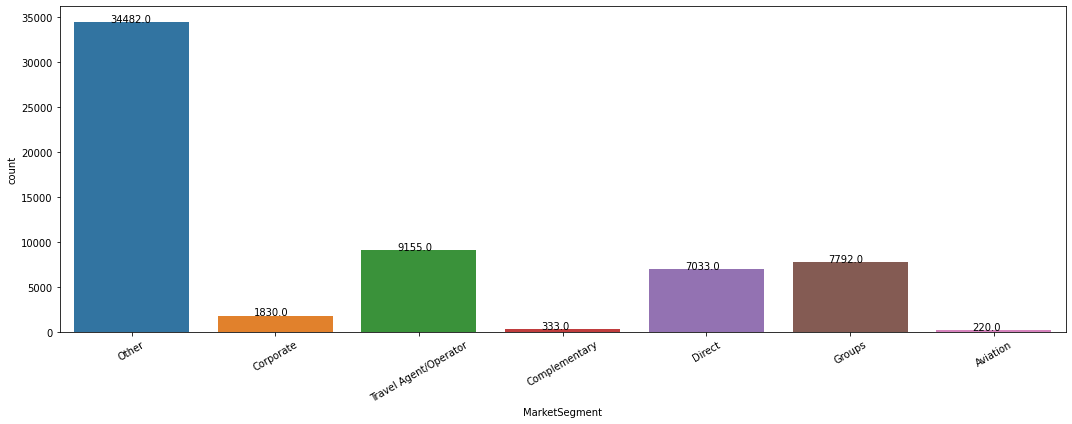

In [25]:
# plotting Market Segmenttation of customers
plt.figure(figsize=(15,6))
plt.xticks(rotation = 30)
ax = sns.countplot(x='MarketSegment',data=final_df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.tight_layout()
plt.show()

1) Most of the customers have not disclosed the reason of trip

2) The second most reason for trip is given as Travel Agent followed by Groups and Direct

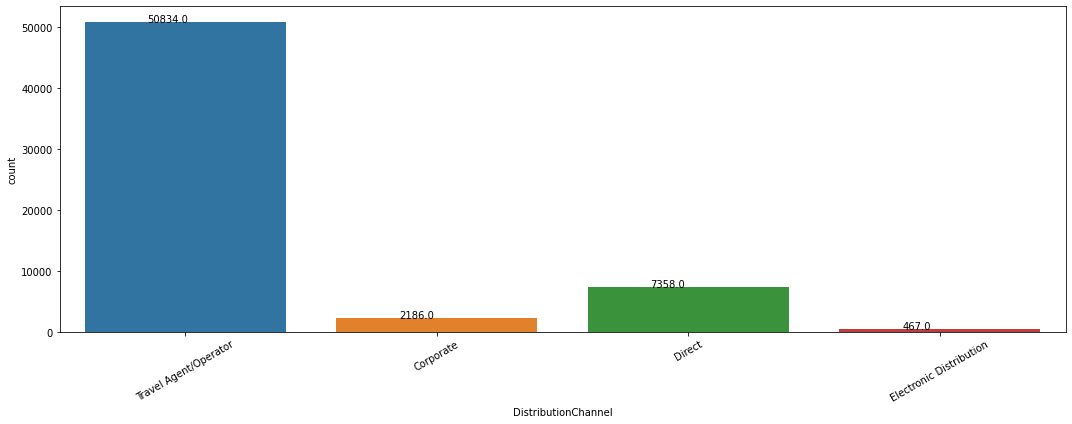

In [26]:
#plotting Distributing Channel of customers
plt.figure(figsize=(15,6))
plt.xticks(rotation = 30)
ax = sns.countplot(x='DistributionChannel',data=final_df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.tight_layout()
plt.show()

1) Maximum number of bookings are done through Travel Agent

2) We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them

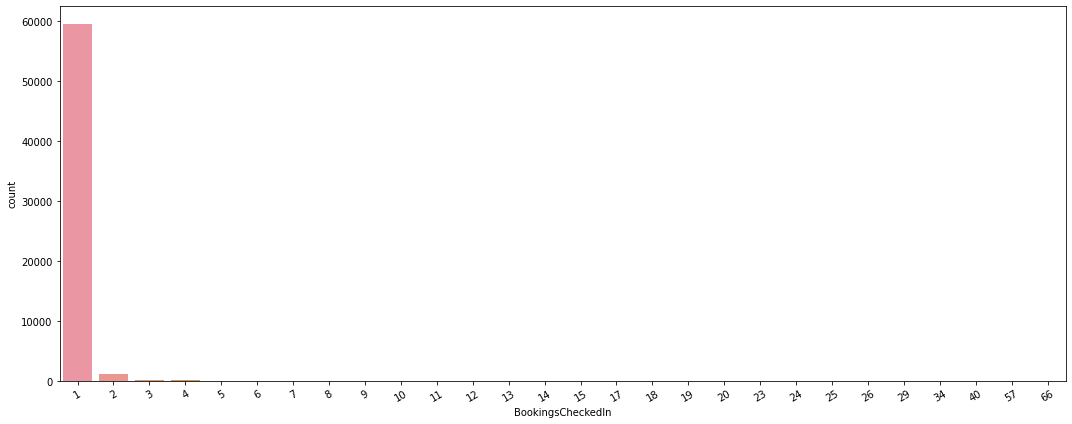

In [27]:
#plotting number of bookings of customers
plt.figure(figsize=(15,6))
plt.xticks(rotation = 30)
ax = sns.countplot(x='BookingsCheckedIn',data=final_df)
plt.tight_layout()
plt.show()

1) Almost all the customers have made a single booking

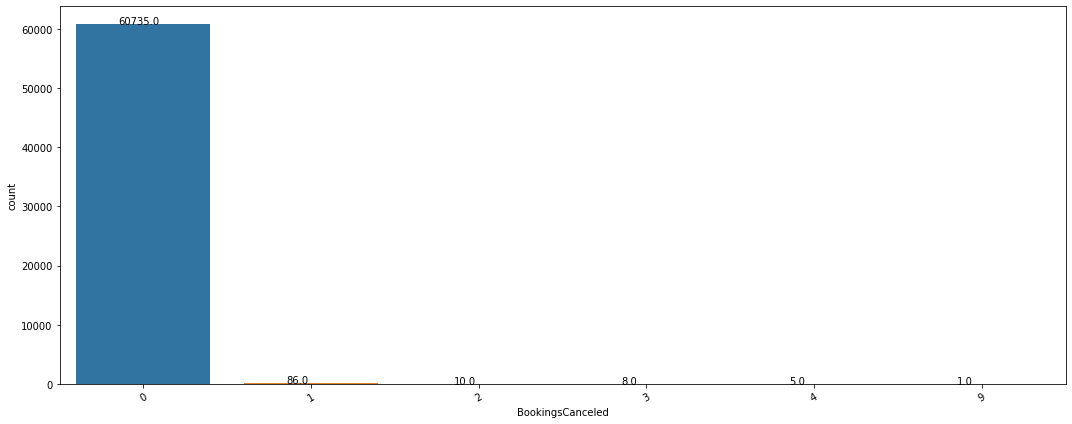

In [28]:
#plotting number of cancelled bookings of customers
plt.figure(figsize=(15,6))
plt.xticks(rotation = 30)
ax = sns.countplot(x='BookingsCanceled',data=final_df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.tight_layout()
plt.show()

1) Almost no bookings have been cancelled once made

In [29]:
# Checking the top 10 countries whose customers spend the most on average
revenue = final_df.groupby(['Nationality'])['total_revenue'].agg('mean').head(10)
fig = px.pie(names=revenue.keys(),values = revenue.values, title='Distribution of Revenue')
fig.show()

In [30]:
#grouping customers by country and distribution channelto find out how much these similar customers spend on average at the hotel
agg_df = pd.DataFrame(final_df.groupby(['Nationality','DistributionChannel'])['total_revenue'].agg('mean')).round(2).sort_values("total_revenue")
agg_df=agg_df.reset_index()
agg_df.head()

,Nationality,DistributionChannel,total_revenue
0,SYC,Travel Agent/Operator,92.75
1,LBN,Electronic Distribution,96.00
2,GNB,Direct,98.00
3,PER,Electronic Distribution,99.00
4,MEX,Electronic Distribution,112.50


# Feature Selection

In [31]:
# Removing outliers
final_df = final_df[final_df['Age'] < 100]
final_df = final_df[final_df['PersonsperRoom'] < 100]
final_df = final_df[final_df['total_revenue'] < 10000]

In [32]:
#label encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['MarketSegment'] = le.fit_transform(final_df['MarketSegment'])
final_df['DistributionChannel'] = le.fit_transform(final_df['DistributionChannel'])

In [33]:
#changinig data type of age to int
final_df['Age']=final_df['Age'].astype('int64')

In [34]:
#creating a traget column
final_df['checked_in']=final_df['BookingsCanceled']+final_df['BookingsNoShowed']

In [35]:
# replacing values greater than equal to 1 with 1
final_df['checked_in'] = (final_df['checked_in'] >= 1) * 1

In [36]:
# Removing Unimportant Columns
final_df.drop(columns=['Unnamed: 0', 'ID', 'Nationality', 'BookingsCanceled', 'BookingsNoShowed', 'DaysSinceCreation', 'LodgingRevenue', 'OtherRevenue', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRShower', 'SRAwayFromElevator', 'AgeGroups'],axis=1,inplace=True)

In [37]:
#dividing the final dataset again into training and testing data
train=final_df[final_df['ind'].eq('train')]
test=final_df[final_df['ind'].eq('test')]
train.drop('ind',axis=1,inplace=True)
test.drop(columns=['ind'],axis=1,inplace=True)

In [38]:
test.to_csv('cleaned_test.csv')

In [39]:
# checking relationship between independent and dependent feature
train.corr()["checked_in"].sort_values()

DistributionChannel    -0.123431
MarketSegment          -0.120395
PersonsperRoom         -0.050325
AverageLeadTime        -0.036124
SRTwinBed              -0.009801
SRQuietRoom            -0.007275
SRHighFloor            -0.006710
SRCrib                 -0.004536
SRBathtub              -0.002472
SRNearElevator         -0.000873
SRNoAlcoholInMiniBar   -0.000426
Age                     0.007262
SRKingSizeBed           0.019520
total_revenue           0.052343
checked_in              1.000000
Name: checked_in, dtype: float64

Text(0.5, 1.0, 'Correlation between different fearures')

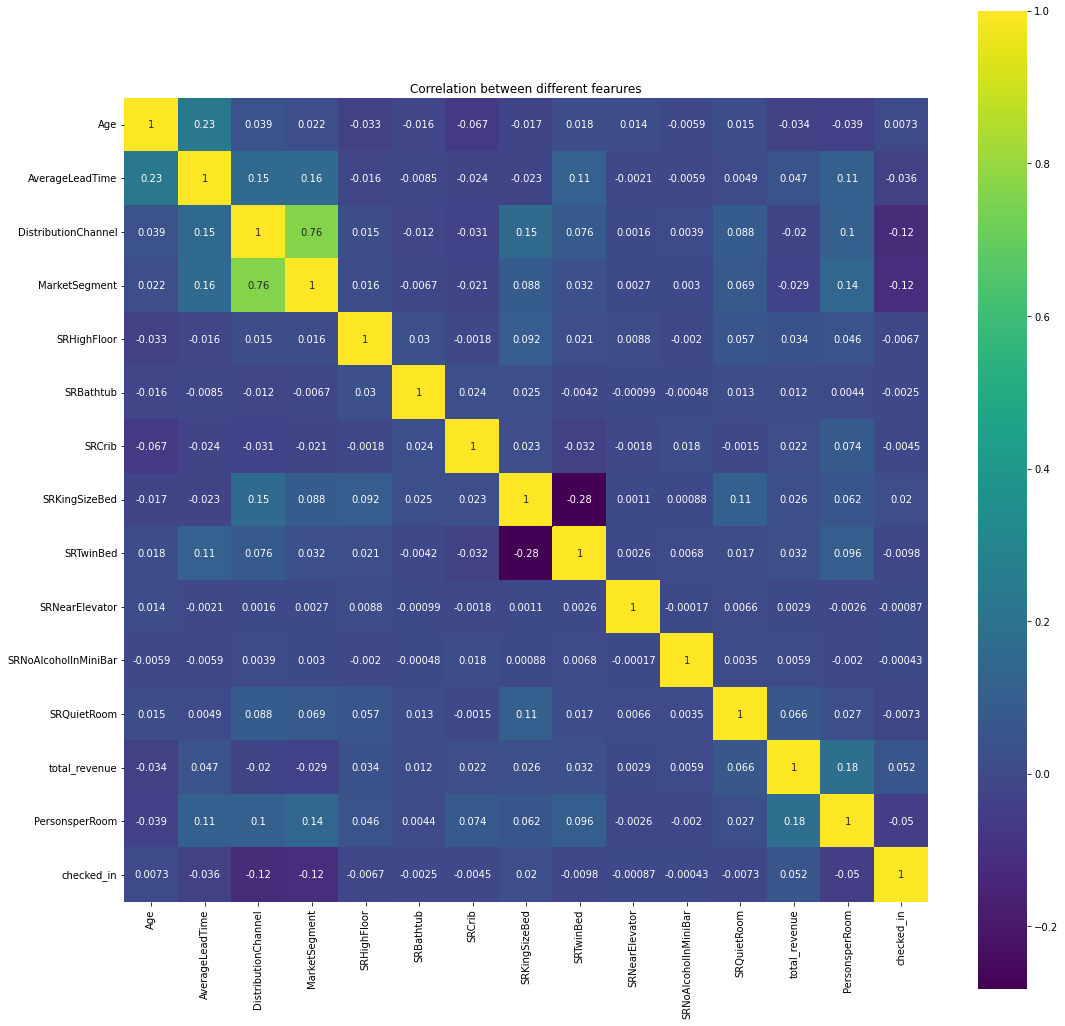

In [40]:
# Plotting a correlation matrix using a heatmap to explore the correlation between features
correlation = train.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')

In [41]:
# Splitting Dependent and Independenet Variables
X = train.drop(['checked_in'], axis = 1)
y = train['checked_in']

In [42]:
# handling imblanced dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [43]:
# splitting training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,random_state = 42,test_size = 0.20, shuffle=True)

In [44]:
#Checking if train data of target feature is equally distributed
y_train.value_counts(normalize=True)

1    0.501162
0    0.498838
Name: checked_in, dtype: float64

In [45]:
#Checking if test data of target feature is equally distributed
y_test.value_counts(normalize=True)

0    0.504647
1    0.495353
Name: checked_in, dtype: float64

# Model Training

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

In [47]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [48]:
# Creating a function containing the Neural Network model and returning the score of the cross-validation
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):

    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}

    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', 'LeakyReLU','relu']
    
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)

    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(neurons, activation=activation))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return model
    
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    model = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(model, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [49]:
# Setting the range of hyperparameters and running the Bayesian Optimization
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------
603/603 [==============================] - 1s 1ms/step
|  1        |  0.4998   |  5.51     |  335.3    |  54.88    |  0.7716   |  36.58    |  1.044    |
603/603 [==============================] - 1s 1ms/step
|  2        |  0.5002   |  0.2023   |  536.2    |  39.09    |  0.3443   |  99.16    |  1.664    |
603/603 [==============================] - 1s 1ms/step
|  3        |  0.5012   |  0.7307   |  735.7    |  69.7     |  0.2815   |  51.96    |  0.8286   |
603/603 [==============================] - 1s 1ms/step
|  4        |  0.5007   |  0.6656   |  920.6    |  83.52    |  0.8422   |  83.37    |  6.937    |
603/603 [==============================] - 1s 1ms/step
|  5        |  0.9451   |  5.195    |  851.0    |  53.71    |  0.03717  |  50.87    |  0.7373   |
603/603 [==============================

In [50]:
# checking the best hyperparameters
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu','elu', 'exponential', 'LeakyReLU', 'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

{'activation': 'selu',
 'batch_size': 851.0135336291902,
 'epochs': 53.7054301919375,
 'learning_rate': 0.037173480215022196,
 'neurons': 50.872297884262295,
 'optimizer': 0.7372825972056519}

# Tuning the Layers

In [51]:
# Creating a function for tuning the Neural Network hyperparameters and layers
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs, layers1, layers2, normalization, dropout, dropout_rate):
    
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']

    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', 'LeakyReLU', 'relu']

    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    def nn_cl_fun():
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        
        if normalization > 0.5:
            model.add(BatchNormalization())

        for i in range(layers1):
            model.add(Dense(neurons, activation=activation))
        
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=123))
        
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model
    
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    model = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(model, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [52]:
# searching the optimum hyperparameters and layers for the Neural Network model
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
603/603 [==============================] - 1s 1ms/step
|  1        |  0.8949   |  5.51     |  335.3    |  0.4361   |  0.2308   |  43.63    |  1.298    |  1.045    |  0.426    |  31.48    |  0.3377   |  6.935    |
603/603 [==============================] - 1s 1ms/step
|  2        |  0.4999   |  2.14     |  265.0    |  0.6696   |  0.1864   |  41.94    |  1.932    |  1.237    |  0.08322  |  91.07    |  0.794    |  5.884    |
603/603 [==============================] - 1s 2ms/step
|  3        |  0.4988   |  7.337    |  992.8    |  0.5773   |  0.2441   |  53.71    |  1.055    |  1.908    |  0.1143   |  83.55    |  0.6977   |  3.957    |
603/603 [==============================] - 1s

In [53]:
# checking the tuned hyperparameters and layers
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', 'LeakyReLU', 'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'softplus',
 'batch_size': 746,
 'dropout': 0.03180999373346571,
 'dropout_rate': 0.2506148814963924,
 'epochs': 76,
 'layers1': 3,
 'layers2': 2,
 'learning_rate': 0.22517196698093564,
 'neurons': 75,
 'normalization': 0.03086998935684493,
 'optimizer': <keras.optimizers.optimizer_v2.adadelta.Adadelta at 0x7f1488425490>}

In [54]:
# Fitting Neural Network with the best tuned parameters
model = Sequential()
model.add(Dense(params_nn_['neurons'], input_dim=X_train.shape[1], activation=params_nn_['activation']))

if params_nn_['normalization'] > 0.5:
  model.add(BatchNormalization())

for i in range(params_nn_['layers1']):
  model.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))

if params_nn_['dropout'] > 0.5:
  model.add(Dropout(params_nn_['dropout_rate'], seed=123))

for i in range(params_nn_['layers2']):
  model.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
model.summary()
        
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)

Model: "sequential_290"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1290 (Dense)          (None, 75)                1125      
                                                                 
 dense_1291 (Dense)          (None, 75)                5700      
                                                                 
 dense_1292 (Dense)          (None, 75)                5700      
                                                                 
 dense_1293 (Dense)          (None, 75)                5700      
                                                                 
 dense_1294 (Dense)          (None, 75)                5700      
                                                                 
 dense_1295 (Dense)          (None, 75)                5700      
                                                                 
 dense_1296 (Dense)          (None, 1)              

In [55]:
#training the model
model_history = model.fit(X_train,y_train,validation_data=(X_test, y_test),batch_size=params_nn_['batch_size'],epochs=params_nn_['epochs'],verbose=1).history

Epoch 1/76
130/130 [==============================] - 2s 6ms/step - loss: 0.5395 - accuracy: 0.7574 - val_loss: 0.8574 - val_accuracy: 0.6873
Epoch 2/76
130/130 [==============================] - 1s 4ms/step - loss: 0.4743 - accuracy: 0.7891 - val_loss: 0.4269 - val_accuracy: 0.8035
Epoch 3/76
130/130 [==============================] - 1s 4ms/step - loss: 0.4272 - accuracy: 0.8187 - val_loss: 0.5893 - val_accuracy: 0.7136
Epoch 4/76
130/130 [==============================] - 1s 4ms/step - loss: 0.3987 - accuracy: 0.8377 - val_loss: 0.4383 - val_accuracy: 0.8105
Epoch 5/76
130/130 [==============================] - 1s 4ms/step - loss: 0.3562 - accuracy: 0.8572 - val_loss: 0.3399 - val_accuracy: 0.8519
Epoch 6/76
130/130 [==============================] - 1s 5ms/step - loss: 0.3441 - accuracy: 0.8644 - val_loss: 0.2815 - val_accuracy: 0.9019
Epoch 7/76
130/130 [==============================] - 1s 5ms/step - loss: 0.3105 - accuracy: 0.8808 - val_loss: 0.4590 - val_accuracy: 0.8065
Epoch 

In [56]:
#checking the max and min values
training_features1= ['accuracy', 'val_accuracy']
training_features2= ['loss', 'val_loss']
for feature in training_features1:   
    print("The best max value obtained for {} is :".format(feature),max(model_history[feature]))

for feature in training_features2:   
    print("The best min value obtained for {} is :".format(feature),min(model_history[feature]))

The best max value obtained for accuracy is : 0.974556028842926
The best max value obtained for val_accuracy is : 0.9765994548797607
The best min value obtained for loss is : 0.0888257548213005
The best min value obtained for val_loss is : 0.08193972706794739


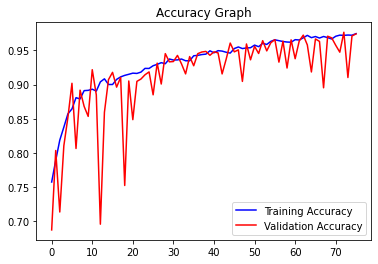

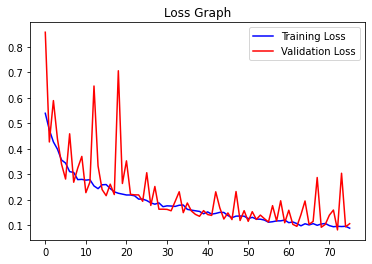

In [57]:
#plotting the loss and accuracy plot
acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = model_history['loss']
val_loss = model_history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [58]:
# checking classification report
from sklearn.metrics import classification_report
y_pred=model.predict(X_test, batch_size=64, verbose=1)
y_pred =(y_pred>0.5)
print(classification_report(y_test, y_pred))

377/377 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     12163
           1       0.96      0.99      0.97     11939

    accuracy                           0.97     24102
   macro avg       0.97      0.97      0.97     24102
weighted avg       0.97      0.97      0.97     24102



In [59]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11709,   454],
       [  169, 11770]])

In [60]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.974151522695212


In [70]:
# Testing With New Data
data_new = {
    'Age' : 28,
    'AverageLeadTime' : 200,
    'MarketSegment' : 1,
    'DistributionChannel': 2,
    'SRHighFloor': 1,
    'SRBathtub': 1,
    'SRCrib': 0,
    'SRKingSizeBed': 1,
    'SRTwinBed': 0,
    'SRNearElevator': 1,
    'SRNoAlcoholInMiniBar': 0,
    'SRQuietRoom': 1,
    'total_revenue': 5000,
    'PersonsperRoom' : 20}

new_test_data = pd.DataFrame(data = data_new, index = [1])
prediction=model.predict(new_test_data)
print(f'The Chances of cancellation is {round(100 * prediction[0][0],2)}%')

1/1 [==============================] - 0s 17ms/step
The Chances of cancellation is 0.0%


In [69]:
if prediction[0] > 0.5:
  print("The customer will not Check In.")

else:
  print("The customer will Check In.")

The customer will Check In.


In [63]:
#saving model
model.save('hotel_customer_model.h5')
#saving weights
model.save_weights('weights.h5')